<a href="https://colab.research.google.com/github/swarna-deep007/Weather_Forecasting/blob/main/Weather_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
weather_data = pd.read_csv("/content/4109917.csv")

/tmp/ipython-input-3420463879.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_data = pd.read_csv("/content/4109917.csv")


In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217531 entries, 0 to 217530
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   STATION          217531 non-null  object 
 1   NAME             217531 non-null  object 
 2   LATITUDE         217531 non-null  float64
 3   LONGITUDE        217531 non-null  float64
 4   ELEVATION        217531 non-null  float64
 5   DATE             217531 non-null  object 
 6   PRCP             94596 non-null   float64
 7   PRCP_ATTRIBUTES  94596 non-null   object 
 8   SNWD             4 non-null       float64
 9   SNWD_ATTRIBUTES  4 non-null       object 
 10  TAVG             217531 non-null  int64  
 11  TAVG_ATTRIBUTES  217531 non-null  object 
 12  TMAX             164326 non-null  float64
 13  TMAX_ATTRIBUTES  164326 non-null  object 
 14  TMIN             160420 non-null  float64
 15  TMIN_ATTRIBUTES  160420 non-null  object 
dtypes: float64(7), int64(1), object(8)
mem

In [ ]:
prcp_unique = weather_data["PRCP_ATTRIBUTES"].unique()
print(prcp_unique)

['D,,S' nan ',,S' ',O,S' 'B,,S' ',G,S']


### PRCP_ATTRIBUTES Meaning

The `PRCP_ATTRIBUTES` column describes the quality flags for precipitation (`PRCP`) data.  
Each attribute is usually in the form `M,F,S` where:

1. **M (Measurement flag)** – Indicates how the data was measured.  
   - `D` = Derived (calculated, not directly measured)  
   - `B` = Estimate based on nearby stations  
   - `G` = Generated automatically  
   - `O` = Observed (direct measurement, best quality)

2. **F (Quality flag)** – Checks for errors or suspicious values.  
   - If blank → No issue  
   - If not blank → There might be a problem with data quality

3. **S (Source flag)** – Tells which data source provided the value.  
   - `S` = Standard source (NOAA official) → Usually reliable

---

### Your Unique Values

- **`D,,S`** → Derived data, no quality issues, standard source ✅ (usable)  
- **`,,S`** → No special measurement flag, no quality issues, standard source ✅ (usable)  
- **`,O,S`** → Observed (directly measured), no quality issues, standard source ✅ (best quality)  
- **`B,,S`** → Estimated data, no quality issues, standard source ⚠️ (usable but less reliable)  
- **`,G,S`** → Generated automatically, no quality issues, standard source ⚠️ (usable but check carefully)

---

### Which Are Bad?

- None of them are truly **bad**, but:  
  - `B,,S` (estimated) and `,G,S` (generated) are **less reliable** than observed (`O`).  
  - For best analysis, prioritize rows with `,O,S` or `,,S`.  
  - Keep `D,,S` if no better data exists.  
  - Treat `B,,S` and `,G,S` as backup values.

### Data Quality Guide for Station Filtering

#### **PRCP (Precipitation):**
- ✅ **Best:** `,,S` or `D,,S`  
- ⚠️ **Watch out:**  
  - `,O,S` → Outliers  
  - `B,,S` → Bad/failed bounds  
  - `,G,S` → Gap-filled (not measured)  

---

#### **TMAX / TMIN (Temperature):**
- ✅ **Best:** `,,S`  
- ⚠️ **Watch out:**  
  - `,O,S` → Outlier  
  - `,I,S` → Interpolated (not measured)  

---

#### **TAVG (Average Temperature):**
- ℹ️ Most values are `H,,S` → Derived from high/low temps (normal and acceptable).  


In [ ]:
station_dfs = {}

# Split dataset by station name
for station, group in weather_data.groupby("NAME"):
    station_dfs[station] = group.reset_index(drop=True)

# Function to check unique values of attribute columns for each station
def check_station_attributes(station_name):
    if station_name not in station_dfs:
        print(f"Station '{station_name}' not found.")
        return

    station_df = station_dfs[station_name]
    print(f"\n--- {station_name} ---")
    for col in station_df.columns:
        if "ATTRIBUTES" in col:  # Only check attribute columns
            print(f"{col} unique values: {station_df[col].dropna().unique()}")

# Example: check attributes for one station
check_station_attributes(list(station_dfs.keys())[0])

# If you want to loop over all stations and see their unique attribute values:
for station in station_dfs.keys():
    check_station_attributes(station)


--- AHMADABAD, IN ---
PRCP_ATTRIBUTES unique values: ['D,,S' ',,S']
SNWD_ATTRIBUTES unique values: []
TAVG_ATTRIBUTES unique values: ['H,,S']
TMAX_ATTRIBUTES unique values: [',,S' ',O,S']
TMIN_ATTRIBUTES unique values: [',,S' ',O,S']

--- AHMADABAD, IN ---
PRCP_ATTRIBUTES unique values: ['D,,S' ',,S']
SNWD_ATTRIBUTES unique values: []
TAVG_ATTRIBUTES unique values: ['H,,S']
TMAX_ATTRIBUTES unique values: [',,S' ',O,S']
TMIN_ATTRIBUTES unique values: [',,S' ',O,S']

--- AKOLA, IN ---
PRCP_ATTRIBUTES unique values: ['D,,S' ',,S']
SNWD_ATTRIBUTES unique values: []
TAVG_ATTRIBUTES unique values: ['H,,S']
TMAX_ATTRIBUTES unique values: [',,S' ',O,S']
TMIN_ATTRIBUTES unique values: [',,S']

--- ALLAHABAD, IN ---
PRCP_ATTRIBUTES unique values: ['D,,S' ',,S']
SNWD_ATTRIBUTES unique values: []
TAVG_ATTRIBUTES unique values: ['H,,S']
TMAX_ATTRIBUTES unique values: [',,S']
TMIN_ATTRIBUTES unique values: [',,S']

--- AMRITSAR, IN ---
PRCP_ATTRIBUTES unique values: ['D,,S' ',,S' ',O,S']
SNWD_ATTRI

In [ ]:
# List of stations you want to keep
stations_to_keep = [
    "ALLAHABAD, IN",
    "BARMER, IN",
    "BHAUNAGAR, IN",
    "CALCUTTA ALIPORE, IN",
    "CHANDIGARH IAFB, IN",
    "CHANDRAPUR, IN",
    "CHERRAPUNJI, IN",
    "COOCH BEHAR, IN"
]

# Filter the dataframe
filtered_df = weather_data[weather_data["NAME"].isin(stations_to_keep)]

# Save filtered data (optional)
filtered_df.to_csv("filtered_stations.csv", index=False)

# Check unique station names in filtered dataset
print(filtered_df["NAME"].unique())

['ALLAHABAD, IN' 'CHANDRAPUR, IN' 'BHAUNAGAR, IN' 'CHERRAPUNJI, IN'
 'COOCH BEHAR, IN' 'CALCUTTA ALIPORE, IN' 'CHANDIGARH IAFB, IN'
 'BARMER, IN']


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28704 entries, 0 to 204642
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          28704 non-null  object 
 1   NAME             28704 non-null  object 
 2   LATITUDE         28704 non-null  float64
 3   LONGITUDE        28704 non-null  float64
 4   ELEVATION        28704 non-null  float64
 5   DATE             28704 non-null  object 
 6   PRCP             8215 non-null   float64
 7   PRCP_ATTRIBUTES  8215 non-null   object 
 8   SNWD             0 non-null      float64
 9   SNWD_ATTRIBUTES  0 non-null      object 
 10  TAVG             28704 non-null  int64  
 11  TAVG_ATTRIBUTES  28704 non-null  object 
 12  TMAX             21000 non-null  float64
 13  TMAX_ATTRIBUTES  21000 non-null  object 
 14  TMIN             20433 non-null  float64
 15  TMIN_ATTRIBUTES  20433 non-null  object 
dtypes: float64(7), int64(1), object(8)
memory usage: 3.7+ MB


In [ ]:
def fill_temperatures(df):
    # Fill missing TMAX using TAVG and TMIN
    mask = df['TMAX'].isna() & df['TAVG'].notna() & df['TMIN'].notna()
    df.loc[mask, 'TMAX'] = 2 * df.loc[mask, 'TAVG'] - df.loc[mask, 'TMIN']

    # Fill missing TMIN using TAVG and TMAX
    mask = df['TMIN'].isna() & df['TAVG'].notna() & df['TMAX'].notna()
    df.loc[mask, 'TMIN'] = 2 * df.loc[mask, 'TAVG'] - df.loc[mask, 'TMAX']

    # Fill missing TAVG using TMAX and TMIN
    mask = df['TAVG'].isna() & df['TMAX'].notna() & df['TMIN'].notna()
    df.loc[mask, 'TAVG'] = (df.loc[mask, 'TMAX'] + df.loc[mask, 'TMIN']) / 2

    return df

# Run function
filtered_df = fill_temperatures(filtered_df)

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28704 entries, 0 to 204642
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          28704 non-null  object 
 1   NAME             28704 non-null  object 
 2   LATITUDE         28704 non-null  float64
 3   LONGITUDE        28704 non-null  float64
 4   ELEVATION        28704 non-null  float64
 5   DATE             28704 non-null  object 
 6   PRCP             8215 non-null   float64
 7   PRCP_ATTRIBUTES  8215 non-null   object 
 8   SNWD             0 non-null      float64
 9   SNWD_ATTRIBUTES  0 non-null      object 
 10  TAVG             28704 non-null  int64  
 11  TAVG_ATTRIBUTES  28704 non-null  object 
 12  TMAX             27393 non-null  float64
 13  TMAX_ATTRIBUTES  21000 non-null  object 
 14  TMIN             27393 non-null  float64
 15  TMIN_ATTRIBUTES  20433 non-null  object 
dtypes: float64(7), int64(1), object(8)
memory usage: 3.7+ MB


In [ ]:
# Fill missing values in TMAX, TMIN, and TAVG with forward-fill then backward-fill
filtered_df[['TMAX', 'TMIN', 'TAVG']] = (
    filtered_df.groupby("STATION")[['TMAX', 'TMIN', 'TAVG']]
    .transform(lambda g: g.ffill().bfill())
)


/tmp/ipython-input-3951450877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['TMAX', 'TMIN', 'TAVG']] = (


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28704 entries, 0 to 204642
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          28704 non-null  object 
 1   NAME             28704 non-null  object 
 2   LATITUDE         28704 non-null  float64
 3   LONGITUDE        28704 non-null  float64
 4   ELEVATION        28704 non-null  float64
 5   DATE             28704 non-null  object 
 6   PRCP             8215 non-null   float64
 7   PRCP_ATTRIBUTES  8215 non-null   object 
 8   SNWD             0 non-null      float64
 9   SNWD_ATTRIBUTES  0 non-null      object 
 10  TAVG             28704 non-null  int64  
 11  TAVG_ATTRIBUTES  28704 non-null  object 
 12  TMAX             28704 non-null  float64
 13  TMAX_ATTRIBUTES  21000 non-null  object 
 14  TMIN             28704 non-null  float64
 15  TMIN_ATTRIBUTES  20433 non-null  object 
dtypes: float64(7), int64(1), object(8)
memory usage: 3.7+ MB


linear regression to fill prcp

In [ ]:
df = filtered_df.copy()

from sklearn.linear_model import LinearRegression
import numpy as np

# Training set: only rows with valid PRCP and all three temps
train = df.dropna(subset=["PRCP", "TAVG", "TMAX", "TMIN"])

if not train.empty:
    X_train = train[["TAVG", "TMAX", "TMIN"]]
    y_train = train["PRCP"]

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prediction set: rows with missing PRCP but valid temps
    missing_mask = df["PRCP"].isnull() & df[["TAVG", "TMAX", "TMIN"]].notnull().all(axis=1)
    X_missing = df.loc[missing_mask, ["TAVG", "TMAX", "TMIN"]]

    if not X_missing.empty:
        df.loc[missing_mask, "PRCP"] = model.predict(X_missing)
    else:
        print("⚠️ No rows with missing PRCP that also have valid TAVG, TMAX, TMIN.")
else:
    print("⚠️ Not enough data to train model (PRCP + temps missing).")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28704 entries, 0 to 204642
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          28704 non-null  object 
 1   NAME             28704 non-null  object 
 2   LATITUDE         28704 non-null  float64
 3   LONGITUDE        28704 non-null  float64
 4   ELEVATION        28704 non-null  float64
 5   DATE             28704 non-null  object 
 6   PRCP             28704 non-null  float64
 7   PRCP_ATTRIBUTES  8215 non-null   object 
 8   SNWD             0 non-null      float64
 9   SNWD_ATTRIBUTES  0 non-null      object 
 10  TAVG             28704 non-null  int64  
 11  TAVG_ATTRIBUTES  28704 non-null  object 
 12  TMAX             28704 non-null  float64
 13  TMAX_ATTRIBUTES  21000 non-null  object 
 14  TMIN             28704 non-null  float64
 15  TMIN_ATTRIBUTES  20433 non-null  object 
dtypes: float64(7), int64(1), object(8)
memory usage: 3.7+ MB


In [ ]:
df = df.drop(columns=["SNWD","SNWD_ATTRIBUTES"], errors="ignore")

In [ ]:
df.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
count,28704.000000,28704.000000,28704.000000,28704.000000,28704.000000,28704.000000,28704.000000
mean,25.077876,78.750562,142.527557,0.253813,80.822185,92.204397,69.126568
std,2.825433,6.505613,147.369526,0.530886,11.016444,10.704947,11.937210
min,19.967000,71.383000,6.000000,-0.935172,43.000000,48.000000,28.000000
25%,22.533000,71.383000,43.000000,0.000000,73.000000,85.000000,60.000000
50%,25.441000,79.300000,98.100000,0.177233,83.000000,93.000000,72.000000
75%,25.750000,81.735000,194.000000,0.359159,88.000000,99.000000,79.000000
max,30.733000,91.733000,1313.000000,18.540000,110.000000,131.000000,100.000000


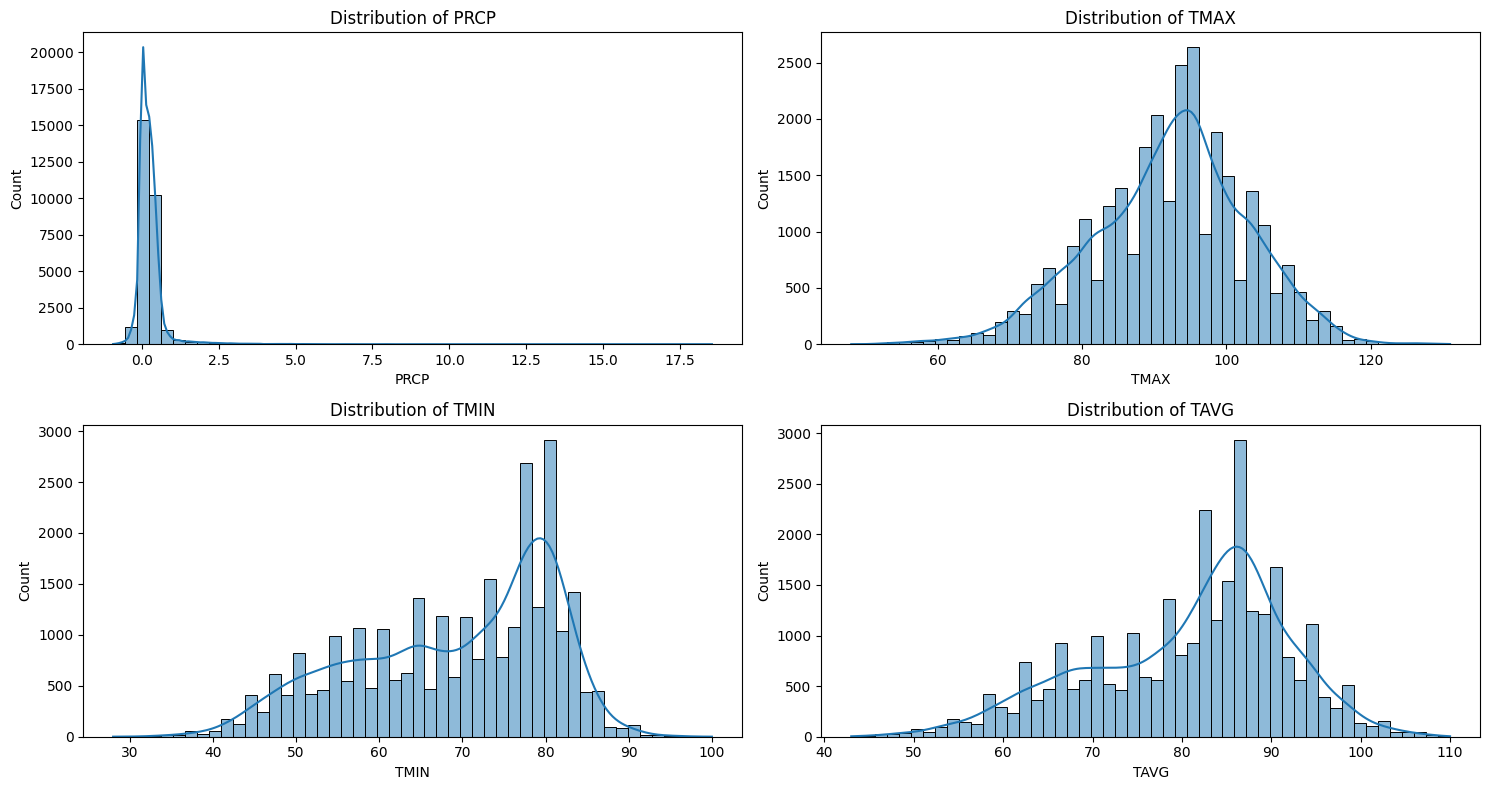

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
for i, col in enumerate(["PRCP", "TMAX", "TMIN", "TAVG"], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

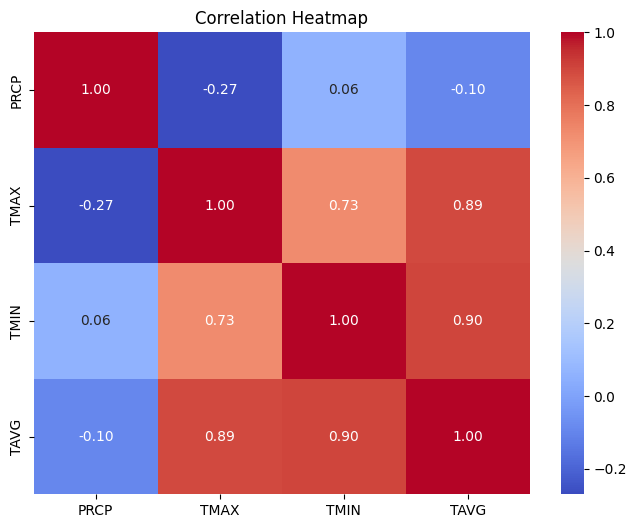

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["PRCP", "TMAX", "TMIN", "TAVG"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


###Forecast heavy rainfall

